# Heating and vapor humidification

This tutorial deals with heating and vapor humidification of Constant Air Volume (CAV) and Variable Air Volume (VAV) HVAC systems. Video explanations for:
 - [Air Handling Units (AHU)](https://www.youtube.com/watch?v=KCiv8IAUkh8&t=561s);
 - [Constant Air Volume (CAV) Systems](https://www.youtube.com/watch?v=zf9fKW2Kwwc&t=14s);
 - [Variable Air Volume (VAV) Systems](https://www.youtube.com/watch?v=vw-bAbjPTd8);
 - [Humidifier Types and Humidity Basics](https://www.youtube.com/watch?v=XJdYxvRKc1U).

----------
**Contents**

**1. All outdoor air**

- [CAV Systems](https://www.youtube.com/watch?v=zf9fKW2Kwwc&t=14s) (video explanation)
    - Modify operation
    - Modify building characteristics
- [VAV Systems](https://www.youtube.com/watch?v=vw-bAbjPTd8) (video explanation)
    - Modify operation
    - Modify building characteristics

**2. Recirculated air**

- [CAV Systems](https://www.youtube.com/watch?v=zf9fKW2Kwwc&t=14s) (video explanation)
    - Modify operation
    - Modify building characteristics
- [VAV Systems](https://www.youtube.com/watch?v=vw-bAbjPTd8) (video explanation)
    - Modify operation
    - Modify building characteristics

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import va_hum

# %matplotlib inline  # uncomment for inline figure
# uncomment for figure in separate window
# %matplotlib qt
# plt.show()

plt.rcParams["figure.figsize"] = (10, 7.7)
font = {'size': 16}
plt.rc('font', **font)

## All outdoor air

In *all outdoor air* systems the mass flow rate of supply air, $\dot m$, is 100 % from outdoor air, $dot m_0$ (i.e., there is no recirculation of indoor air).

### Constant air volume (CAV)

In *constant air volume* systems the mass flow rate $dot m$ is not controlled (i.e., the fan has a constant air flow rate). 

![winter_VaHum_AllO_CAV](./Figures/heat_VaHum_AllO_CAV.svg)
> Figure 1. CAV system for a single termal zone with AHU for heating and vapor humidification.

The `AllOutAirCAV` function from module `va_hum.py` can be accessed directly.

Winter All_out_air CAV
m =  0.127 kg/s constant (from design conditions)
Design conditions θS =  30.0 °C,mi = 0.0 kg/s, θO = -1.0 °C, θI = 18.0 °C


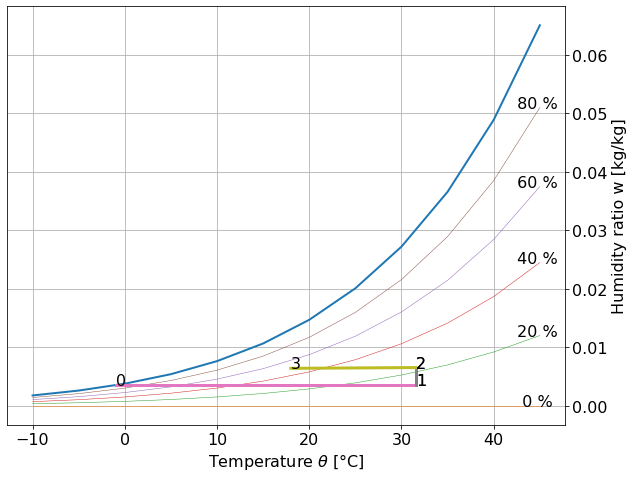


  θ [°C] w [g/kg]
O  -1.00     3.51
1  31.57     3.51
2  31.57     6.53
3  18.00     6.40

   QsHC  QlVH  QsTZ  QlTZ
0  4.14  0.96 -1.72 -0.04 kW


array([ 3.15657301e+01,  3.50762828e-03,  3.15657301e+01,  6.53069835e-03,
        1.79999996e+01,  6.40087792e-03,  4.13693324e+03,  9.58540549e+02,
       -1.72329996e+03, -4.11628412e+01])

In [2]:
va_hum.AllOutAirCAV(θS=30, θIsp=18, φIsp=0.5, θO=-1, φO=1,
                    Qsa=0, Qla=0, mi=0.0057, UA=85.0)

#### Modify the operation

> Table 1. Widgets to modify the operation of the HVAC system.

|Widget| Symbol         | Unit| Meaning                               |
|------|----------------|-----|---------------------------------------|
|`θSsp`|$\theta_S^{sp}$ | °C  |Set-point for supply air temperature (not active)|
|`θIsp`|$\theta_I^{sp}$ | °C  |Set-point for indoor air temperature   |
|`φIsp`|$\varphi_I^{sp}$|     |Set-point for indoor relative humidity |
|`θO`  |$\theta_O$      | °C  |Outdoor air temperature                |
|`φO`  |$\varphi_O$     |     |Outdoor air relative humidity          |

In [3]:
def AllOutAirCAV_wd(θSsp=30, θIsp=18, φIsp=0.5, θO=-1, φO=1):
    Qsa = 2163.5
    Qsa = 0
    Qla = 145.2
    Qla = 0
    mi = 0.0057
    UA = 85.9
    from va_hum import AllOutAirCAV
    AllOutAirCAV(θSsp, θIsp, φIsp, θO, φO, Qsa, Qla, mi, UA)

In [4]:
interact(AllOutAirCAV_wd, θSsp=(20, 50, 2),
         θIsp=(17, 25, 1), φIsp=(0, 1, 0.1),
         θO=(-10., 17., 2), φO=(0, 1, 0.1));

interactive(children=(IntSlider(value=30, description='θSsp', max=50, min=20, step=2), IntSlider(value=18, des…

#### Modify the characteristics of the building

> Table 2. Widgets to modify the characteritics of the building.

|Widget| Symbol         | Unit| Meaning                                   |
|------|----------------|-----|-------------------------------------------|
|`Qsa` |$\dot{Q}_{s,a}$ | W   |Auxiliary sensible heat of the thermal zone|
|`Qla` |$\dot{Q}_{l,a}$ | W   |Auxiliary latent heat of the thermal zone|
|`mi`  |$\dot{m}_i$     | kg/s|Mass flow rate of air infiltration into the thermal zone|
|`UA`  |$U A$           | W/°C|Overall thermal conductance of the thermal zone|

In [5]:
Qsa = 2163.5
Qla = 145.2
mi = 0.0057
UA = 85.9
def AllOutAirCAV_wd(Qsa, Qla, mi, UA):
    θSsp = 30
    θIsp = 18
    φIsp = 0.5
    θO = -1
    φO = 1
    from va_hum import AllOutAirCAV
    AllOutAirCAV(θSsp, θIsp, φIsp, θO, φO, 
                 Qsa, Qla, mi, UA)

In [6]:
interact(AllOutAirCAV_wd, Qsa=(0, 5000,10), Qla=(0, 1500, 10),
         mi=(0, 0.1, 0.001), UA=(40, 160, 2));

interactive(children=(IntSlider(value=2500, description='Qsa', max=5000, step=10), IntSlider(value=750, descri…

### Variable air volume (VAV)

![fig](./Figures/heat_VaHum_AllO_VAV.svg)

> Figure 2. VAV system for a single termal zone with AHU for heating and vapor humidification.

The `AllOutAirVAV` function from module `va_hum.py` can be accessed directly.

Winter All_out_air VAV
m =  4.840 kg/s


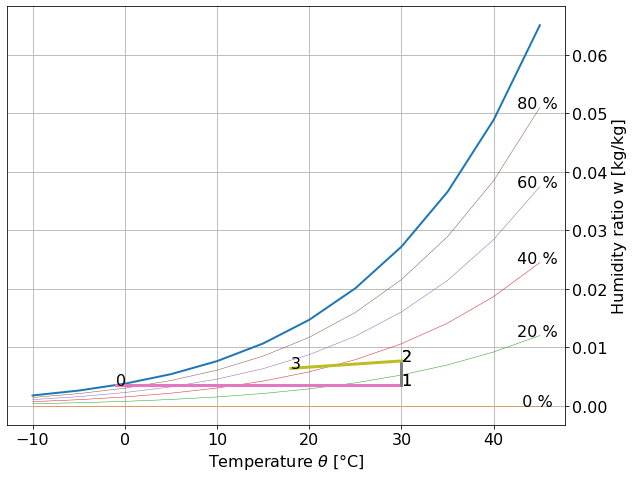


  θ [°C] w [g/kg]
0  -1.00     3.51
1  30.00     3.51
2  30.00     7.66
3  18.00     6.40

    QsHC  QlVH   QsTZ   QlTZ
0 150.02 50.18 -58.06 -15.28 kW


In [7]:
va_hum.AllOutAirVAV(θSsp=30, θIsp=18, φIsp=0.5, θO=-1, φO=1,
                    Qsa=0, Qla=0, mi=2.12, UA=935.83)

#### Modify the operation

> Table 3. Widgets to modify the operation of the HVAC system.

|Widget| Symbol         |          | Unit| Meaning                               |
|------|----------------|----------|-----|---------------------------------------|
|`θSsp`|$\theta_S^{sp}$ |$\theta_2^{sp}$| °C|Set-point for supply air temperature   |
|`θIsp`|$\theta_I^{sp}$ |$\theta_3^{sp}$| °C|Set-point for indoor air temperature   |
|`φIsp`|$\varphi_I^{sp}$|$\varphi_3^{sp}$|  |Set-point for indoor relative humidity |
|`θO`  |$\theta_O$      |$\theta_0$| °C  |Outdoor air temperature                |
|`φO`  |$\varphi_O$     |$\varphi_0$|    |Outdoor air relative humidity          |


In [8]:
def AllOutAirVAV_wd(θSsp=30, θIsp=18, φIsp=0.5, θO=-1, φO=1):
    # Qsa=2163.5
    Qsa = 200
    Qla = 145.2
    mi = 0.00569
    UA = 85.9
    from va_hum import AllOutAirVAV
    AllOutAirVAV(θSsp, θIsp, φIsp, θO, φO, Qsa, Qla, mi, UA)

In [9]:
interact(AllOutAirVAV_wd, θSsp=(20, 50, 2),
         θIsp=(17, 25, 1), φIsp=(0, 1, 0.1),
         θO=(-10., 17., 1), φO=(0, 1, 0.1));

interactive(children=(IntSlider(value=30, description='θSsp', max=50, min=20, step=2), IntSlider(value=18, des…

#### Modify the characteristics of the building

> Table 4. Widgets to modify the characteritics of the building.

|Widget| Symbol         | Unit| Meaning                                   |
|------|----------------|-----|-------------------------------------------|
|`Qsa` |$\dot{Q}_{s,a}$ | W   |Auxiliary sensible heat of the thermal zone|
|`Qla` |$\dot{Q}_{l,a}$ | W   |Auxiliary latent heat of the thermal zone|
|`mi`  |$\dot{m}_i$     | kg/s|Mass flow rate of air infiltration into the thermal zone|
|`UA`  |$U A$           | W/°C|Overall thermal conductance of the thermal zone|

In [10]:
Qsa = 2163.5
Qla = 145.2
mi = 0.0057
UA = 85.9
def AllOutAirVAV_wd(Qsa, Qla, mi, UA):
    θSsp = 30
    θIsp = 18
    φIsp = 0.5
    θO = -1
    φO = 1
    from va_hum import AllOutAirVAV
    AllOutAirVAV(θSsp, θIsp, φIsp, θO, φO, 
                 Qsa, Qla, mi, UA)

In [11]:
interact(AllOutAirVAV_wd, Qsa=(0, 15000, 50), Qla=(0, 15000, 50),
         mi=(0, 5, 0.2), UA=(700, 1000, 10));

interactive(children=(IntSlider(value=7500, description='Qsa', max=15000, step=50), IntSlider(value=7500, desc…

## Recycled air

### Constant air volume (CAV)

- supply air mass flow rate: constant - determined for design conditions
- supply temperature varies

![winter_VaHum_Rec_CAV](./Figures/heat_VaHum_Rec_CAV.svg)
> Figure 3. CAV system for a single termal zone with AHU for heating and vapor humidification with recycled air.

The `RecAirCAV` function from module `va_hum.py` can be accessed directly.

Winter Recirculated_air CAV
m =  1.491 kg/s constant (from design conditions)
Design conditions θS =  30.0 °C,mi = 0.0 kg/s, θO = -1.0 °C, θI = 18.0 °C
wO = 0.00351


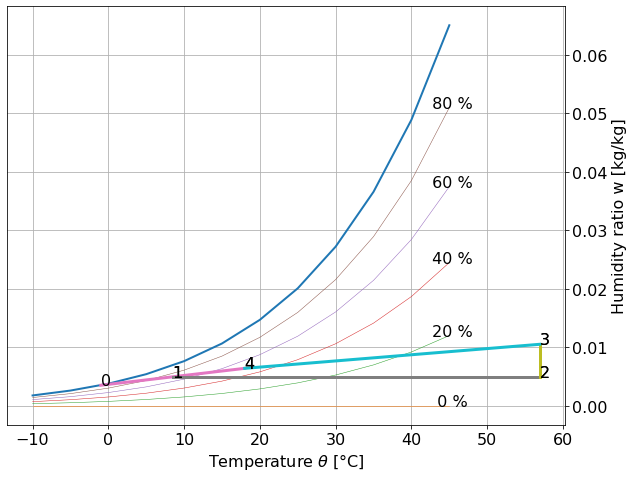


  θ [°C] w [g/kg]
0  -1.00     3.51
1   8.50     4.95
2  56.95     4.95
3  56.95    10.51
4  18.00     6.40

   QsHC  QlVH   QsTZ   QlTZ
0 72.22 20.68 -58.06 -15.30 kW


In [12]:
va_hum.RecAirCAV(α=0.5, θS=30, θIsp=18, φIsp=0.5, θO=-1, φO=1,
                 Qsa=0, Qla=0, mi=2.12, UA=935.83)

#### Modify the operation

> Table 5. Widgets to modify the operation of the HVAC system.

|Widget| Symbol         |          | Unit| Meaning                               |
|------|----------------|----------|-----|---------------------------------------|
|`α`   |$\alpha$        |          |     |Proportion of outdoor air in the supply air|
|`θS`  |$\theta_S^{sp}$ |$\theta_2^{sp}$| °C|Set-point for supply air temperature   |
|`θIsp`|$\theta_I^{sp}$ |$\theta_3^{sp}$| °C|Set-point for indoor air temperature   |
|`φIsp`|$\varphi_I^{sp}$|$\varphi_3^{sp}$|  |Set-point for indoor relative humidity |
|`θO`  |$\theta_O$      |$\theta_0$| °C  |Outdoor air temperature                |
|`φO`  |$\varphi_O$     |$\varphi_0$|    |Outdoor air relative humidity          |


In [13]:
def RecAirCAV_wd(α=0.5, θS=30, θIsp=18, φIsp=0.5, θO=-1, φO=1):
    Qsa = 0.
    Qla = 0.
    mi = 1
    UA = 935.83
    from va_hum import RecAirCAV
    RecAirCAV(α, θS, θIsp, φIsp, θO, φO, Qsa, Qla, mi, UA)

In [14]:
interact(RecAirCAV_wd, α = (0, 1, 0.1), θS = (20, 50, 2),
         θIsp = (17, 25, 1), φIsp = (0, 1, 0.1),
         θO = (-10., 17., 2), φO = (0, 1, 0.1));

interactive(children=(FloatSlider(value=0.5, description='α', max=1.0), IntSlider(value=30, description='θS', …

#### Modify the characteristics of the building


> Table 6. Widgets to modify the characteritics of the building.

|Widget| Symbol         | Unit| Meaning                                   |
|------|----------------|-----|-------------------------------------------|
|`Qsa` |$\dot{Q}_{s,a}$ | W   |Auxiliary sensible heat of the thermal zone|
|`Qla` |$\dot{Q}_{l,a}$ | W   |Auxiliary latent heat of the thermal zone|
|`mi`  |$\dot{m}_i$     | kg/s|Mass flow rate of air infiltration into the thermal zone|
|`UA`  |$U A$           | W/°C|Overall thermal conductance of the thermal zone|

In [15]:
def RecAirCAV_wd(Qsa=0, Qla=0, mi=2.12, UA=935.83):
    α = 0.5
    θSsp = 30
    θIsp = 18
    φIsp = 0.5
    θO = -1
    φO = 1
    from va_hum import RecAirCAV
    RecAirCAV(α, θSsp, θIsp, φIsp, θO, φO, 
              Qsa, Qla, mi, UA);

In [16]:
interact(RecAirCAV_wd, Qsa=(0, 15000, 50), Qla=(0, 15000, 50),
         mi=(0, 5, 0.2), UA=(700, 1000, 10));

interactive(children=(IntSlider(value=0, description='Qsa', max=15000, step=50), IntSlider(value=0, descriptio…

### Variable air volume (VAV)

![winter_VaHum_Rec_VAV](./Figures/heat_VaHum_Rec_VAV.svg)

> Figure 4. VAV system for a single termal zone with AHU for heating and vapor humidification with recycled air.

The `RecAirVAV` function from module `va_hum.py` can be accessed directly.

Winter Rec_air VAV
m =  4.840 kg/s
wO = 0.00351


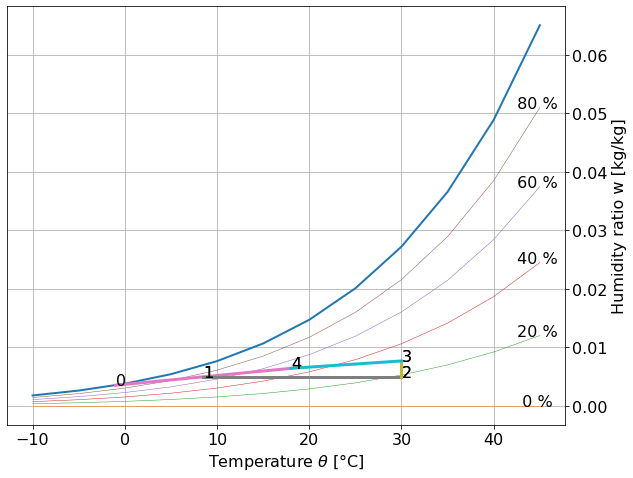


  θ [°C] w [g/kg]
0  -1.00     3.51
1   8.50     4.95
2  30.00     4.95
3  30.00     7.66
4  18.00     6.40

    QsHC  QlVH   QsTZ   QlTZ
0 104.04 32.75 -58.06 -15.29 kW


In [17]:
va_hum.RecAirVAV(α=0.5, θSsp=30, θIsp=18, φIsp=0.5, θO=-1, φO=1,
                 Qsa=0, Qla=0, mi=2.12, UA=935.83)

#### Modify operation

> Table 6. Widgets to modify the operation of the HVAC system.

|Widget| Symbol         |          | Unit| Meaning                               |
|------|----------------|----------|-----|---------------------------------------|
|`α`   |$\alpha$        |          |     |Proportion of outdoor air in the supply air|
|`θS`  |$\theta_S^{sp}$ |$\theta_2^{sp}$| °C|Set-point for supply air temperature   |
|`θIsp`|$\theta_I^{sp}$ |$\theta_3^{sp}$| °C|Set-point for indoor air temperature   |
|`φIsp`|$\varphi_I^{sp}$|$\varphi_3^{sp}$|  |Set-point for indoor relative humidity |
|`θO`  |$\theta_O$      |$\theta_0$| °C  |Outdoor air temperature                |
|`φO`  |$\varphi_O$     |$\varphi_0$|    |Outdoor air relative humidity          |

In [18]:
def RecAirVAV_wd(α=0.5, θS=30, θIsp=18, φIsp=0.5, θO=-1, φO=1):
    Qsa = 0.
    Qla = 0.
    mi = 2.12
    UA = 935.83
    from va_hum import RecAirVAV
    RecAirVAV(α, θS, θIsp, φIsp, θO, φO, Qsa, Qla, mi, UA)

In [19]:
interact(RecAirVAV_wd, alpha = (0, 1, 0.1), tSsp = (20, 50, 2),
         tIsp = (17, 25, 1), phiIsp = (0, 1, 0.1),
         tO = (-10., 17., 2), phiO = (0, 1, 0.1));

interactive(children=(FloatSlider(value=0.5, description='α', max=1.5, min=-0.5), IntSlider(value=30, descript…

#### Modify the characteristics of the building

> Table 7. Widgets to modify the characteritics of the building.

|Widget| Symbol         | Unit| Meaning                                   |
|------|----------------|-----|-------------------------------------------|
|`Qsa` |$\dot{Q}_{s,a}$ | W   |Auxiliary sensible heat of the thermal zone|
|`Qla` |$\dot{Q}_{l,a}$ | W   |Auxiliary latent heat of the thermal zone|
|`mi`  |$\dot{m}_i$     | kg/s|Mass flow rate of air infiltration into the thermal zone|
|`UA`  |$U A$           | W/°C|Overall thermal conductance of the thermal zone|

In [20]:
def RecAirVAV_wd(Qsa=0, Qla=0, mi=2.12, UA=935.83):
    α = 0.5
    θSsp = 30
    θIsp = 18
    φIsp = 0.5
    θO = -1
    φO = 1
    from va_hum import RecAirVAV
    RecAirVAV(α, θSsp, θIsp, φIsp, θO, φO, 
                 Qsa, Qla, mi, UA)

In [21]:
interact(RecAirVAV_wd, Qsa=(0, 15000, 50), Qla=(0, 15000, 50),
         mi=(0, 5, 0.2), UA=(700, 1000, 10));

interactive(children=(IntSlider(value=0, description='Qsa', max=15000, step=50), IntSlider(value=0, descriptio…

## Bibliography

*Coding*
1. [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/)

2. [Pandas: Getting started](https://pandas.pydata.org/getting_started.html)

3. Chris Albon, [Data Science & Machine Learning](https://chrisalbon.com/#code_python), chrisalbon.com

*HVAC basics*

1. TRANE (2013) [Understanding Single-Zone VAV Systems](https://www.trane.com/content/dam/Trane/Commercial/global/products-systems/education-training/engineers-newsletters/airside-design/admapn047en_0413.pdf)

2. TRANE (2005) [CO2-Based Demand-Controlled Ventilation](https://www.trane.com/content/dam/Trane/Commercial/global/products-systems/education-training/engineers-newsletters/airside-design/admapn017en_1005.pdf)

3. The Engineering Mindset (2018) [How Air Handling Units work](https://www.youtube.com/watch?v=KCiv8IAUkh8&t=561s), YouTube.com

4. The Engineering Mindset (2020) [Constant Air Volume](https://www.youtube.com/watch?v=zf9fKW2Kwwc&t=14s), YouTube.com

5. The Engineering Mindset (2020) [VAV Variable Air Volume](https://www.youtube.com/watch?v=vw-bAbjPTd8), YouTube.com

6. MEP Academy (2022) [Humidifier Types and Humidity Basics](https://www.youtube.com/watch?v=XJdYxvRKc1U), YouTube.com

*Catalogs*
1. TRANE [Performance Climate Changer™ Air HandlersSizes 3-120](https://www.academia.edu/37795196/Performance_Climate_Changer_Air_Handlers_Sizes_3-120_Indoor_and_Outdoor_Units_Application_and_Performance_Information_Catalog)

1. TRANE [Residential Steam Humidifier Owner’s Manual](https://www.trane.com/pdf/Steam-Humidifier-Manual.pdf)
